In [45]:
# import kan library and init model
from kan import *

model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [46]:
import kan

In [47]:
# create dataset  f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi * x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
print(dataset['train_input'].shape)
print(dataset['test_input'].shape)

torch.Size([1000, 2])
torch.Size([1000, 2])


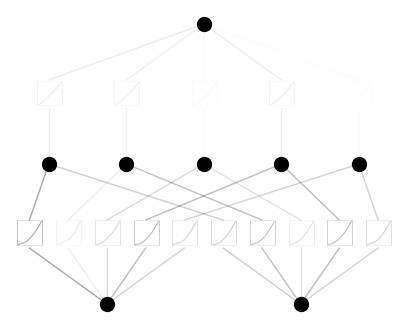

In [48]:
# forward pass the dataset to the model and plot initial model
model(dataset['train_input'])
model.plot()

train loss: 6.05e-02 | test loss: 6.33e-02 | reg: 7.82e+00 : 100%|██| 20/20 [01:35<00:00,  4.80s/it]


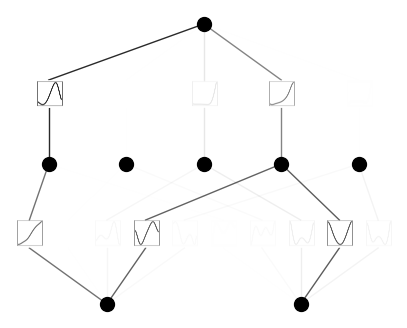

In [49]:
image_folder = 'video_img'
# train the model and plot the trained model
model.train(dataset, lamb=0.01, steps=20, save_fig=True, img_folder=image_folder)
# model.train(dataset, lamb=0.01, steps=20)
model.plot()

In [50]:
import os
import numpy as np
import moviepy.video.io.ImageSequenceClip # moviepy == 1.0.3

video_name='video'
fps=5
image_folder = 'video_img'
fps = fps
files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))

train_index = np.sort(train_index)

image_files = [image_folder+'/'+str(train_index[index])+'.jpg' for index in train_index]

clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_videofile(video_name+'.mp4')

Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


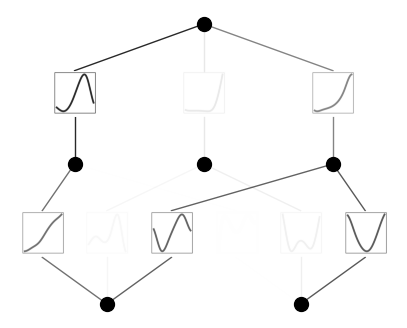

In [51]:
# prune and plot the model again
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 6.86e-02 | test loss: 7.12e-02 | reg: 6.38e+00 : 100%|██| 20/20 [00:06<00:00,  2.91it/s]


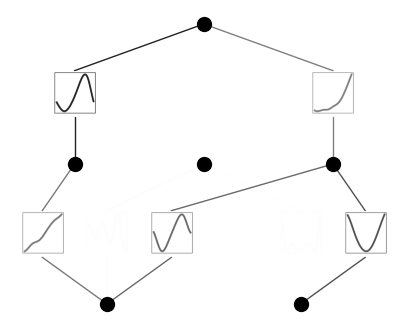

In [52]:
# train again and plot
model.train(dataset, lamb=0.01, steps=20)
model.plot()

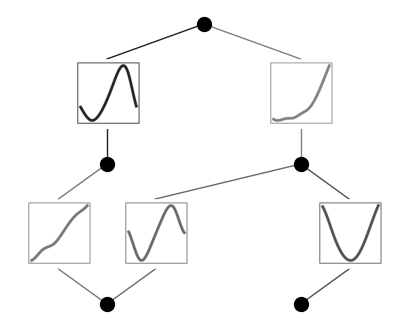

In [53]:
# prune and plot the model again
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 4.04e-02 | test loss: 4.15e-02 | reg: 5.17e+00 : 100%|██| 20/20 [00:05<00:00,  3.44it/s]


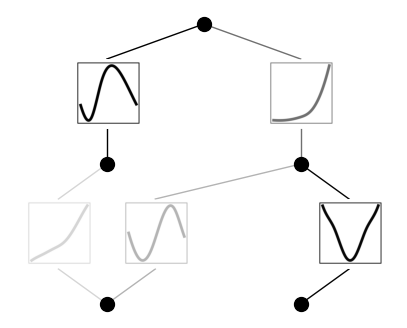

In [54]:
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 7.33e-02 | test loss: 7.03e-02 | reg: 5.06e+00 : 100%|██| 20/20 [00:05<00:00,  3.66it/s]


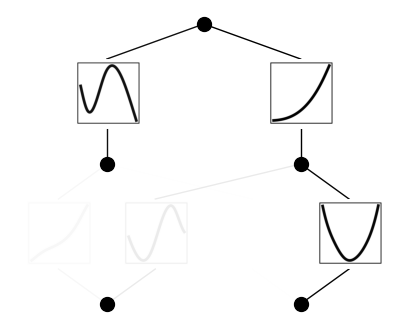

In [55]:
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 6.31e-02 | test loss: 6.23e-02 | reg: 4.81e+00 : 100%|██| 20/20 [00:03<00:00,  5.46it/s]


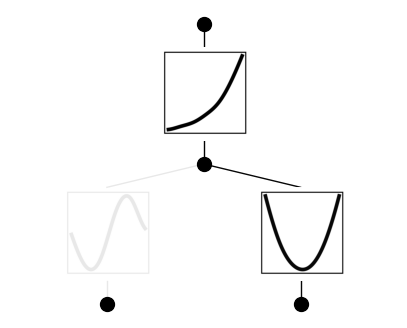

In [56]:
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 4.08e-02 | test loss: 4.26e-02 | reg: 5.85e+00 : 100%|██| 20/20 [00:04<00:00,  4.50it/s]


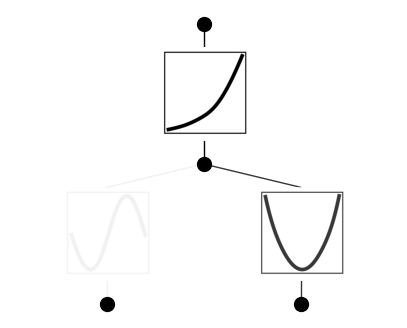

In [57]:
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model = model.prune()
model(dataset['train_input'])
model.plot()

train loss: 4.57e-02 | test loss: 4.58e-02 | reg: 7.85e+00 : 100%|██| 20/20 [00:04<00:00,  4.42it/s]


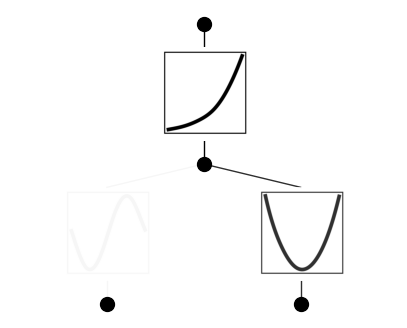

In [58]:
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model = model.prune()
model(dataset['train_input'])
model.plot()

In [59]:
# suggest symbols
model.auto_symbolic()

fixing (0,0,0) with sin, r2=0.9996380805969238
fixing (0,1,0) with x^2, r2=0.9998235106468201
fixing (1,0,0) with gaussian, r2=0.9996415972709656


In [60]:
# extract symbols
model.symbolic_formula()[0][0]

0.25 + 390.16*exp(-6.26*(-0.1*x_2**2 + 0.1*sin(3.16*x_1 + 9.41) + 1)**2)

In [61]:
model.unfix_symbolic_all()

If the symbols are reasonable then fix them and train

In [62]:
model.fix_symbolic(0,0,0,'sin')
model.fix_symbolic(0,1,0,'x^2')

r2 is 0.9996380805969238
r2 is 0.9998235106468201


tensor(0.9998)

In [63]:
# let's see other options for (0,0,1)
model.suggest_symbolic(1,0,0)

function , r2
gaussian , 0.9996415972709656
x^4 , 0.9989824891090393
1/x^4 , 0.9986754059791565
1/x^3 , 0.998317301273346
x^3 , 0.9977647662162781


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9996415972709656)

In [64]:
# more options
model.suggest_symbolic(1,0,0, topk=50)

function , r2
gaussian , 0.9996415972709656
x^4 , 0.9989824891090393
1/x^4 , 0.9986754059791565
1/x^3 , 0.998317301273346
x^3 , 0.9977647662162781
1/x^2 , 0.9975930452346802
1/x , 0.9956589341163635
tan , 0.9955222010612488
1/sqrt(x) , 0.9930608868598938
cosh , 0.9920933246612549
x^2 , 0.9892231822013855
sin , 0.9891493916511536
log , 0.9857614636421204
arctanh , 0.9825167059898376
tanh , 0.9824250936508179
sqrt , 0.9484599828720093
arcsin , 0.9434228539466858
exp , 0.940589189529419
arctan , 0.939019501209259
sigmoid , 0.9211920499801636
abs , 0.8988262414932251
x , 0.8566436171531677
sgn , 0.6947208046913147
0 , 0.0


('gaussian',
 (<function kan.utils.<lambda>(x)>, <function kan.utils.<lambda>(x)>),
 0.9996415972709656)

In [65]:
# fit model to symbols and train
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.01, steps=20)
model.plot()

train loss: nan | test loss: nan | reg: nan :  25%|████▌             | 5/20 [00:01<00:05,  2.87it/s]


Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.

Intel MKL ERROR: Parameter 6 was incorrect on entry to SGELSY.


RuntimeError: false INTERNAL ASSERT FAILED at "/Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp":1540, please report a bug to PyTorch. torch.linalg.lstsq: (Batch element 0): Argument 6 has illegal value. Most certainly there is a bug in the implementation calling the backend library.

In [ ]:
# extract symbols
model.symbolic_formula()[0][0]

In [ ]:
model.unfix_symbolic_all()

In [ ]:
# fit model to symbols and train
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.1, steps=20)
model.plot()

In [ ]:
# fit model to symbols and train
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.1, steps=20)
model.plot()

In [ ]:
# fit model to symbols and train
# repeat train->prune->plot until stable
model.train(dataset, lamb=0.1, steps=20)
model.plot()

In [ ]:
model.auto_symbolic()